In [1]:
# Importamos librerias
import numpy as np
import scipy.integrate
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

In [ ]:
# Definimos la constante universal
G = 6.67408e-11 # N*m2/kg2

# Cantidades de referencia
m_nd = 1.989e+30 # Masa del Sol - kg
r_nd = 5.326e+12 # Distancia entre estrellas en Alpha Centauri - m
v_nd = 30000 # Velocidad relativa de la tierra alrededor del sol  - m/s
t_nd = 79.91 * 365 * 24 * 3600 * 0.51 # Periodo orbital de Alpha Centauri - s

# Constantes netas
K1 = G * t_nd * m_nd / (r_nd**2 * v_nd)
K2 = v_nd * t_nd / r_nd

In [ ]:
# Definimos las masas
m1 = 1.1 # Alpha Centauri A - kg
m2 = 0.907 # Alpha Centauri B -  kg

# Definimos los vectores de posición inicial
r1 = [-0.5, 0, 0] # m
r2 = [0.5, 0, 0] # m

# Convertimos los vectores de posición en arreglos
r1 = np.array(r1, dtype="float64")
r2 = np.array(r2, dtype="float64")

# Encontramos el centro de masa COM
r_com = (m1 * r1 + m2 * r2) / (m1 + m2)

# Definimos las velocidades iniciales
v1 = [0.01, 0.01, 0] # m/s
v2 = [-0.05, 0, -0.1] # m/s

# Convertimos los vectores de posición en arreglos
v1 = np.array(v1, dtype="float64")
v2 = np.array(v2, dtype="float64")

# Encontramos la velocidad del centro de masa
v_com = (m1 * v1 + m2 * v2) / (m1 + m2)

In [ ]:
# Una función que define las ecuaciones de movimiento
def TwoBodyEquations(w, t, G, m1, m2):
    r1 = w[:3]
    r2 = w[3:6]
    v1 = w[6:9]
    v2 = w[9:12]

    # Calcular la magnitud o norma del vector
    r = np.linalg.norm(r2 - r1)

    dv1bydt = K1 * m2 * (r2 - r1) / r**3
    dv2bydt = K1 * m1 * (r1-r2) / r**3
    dr1bydt = K2 * v1
    dr2bydt = K2 * v2

    r_derivs = np.concatenate((dr1bydt, dr2bydt))
    derivs = np.concatenate((r_derivs, dv1bydt, dv2bydt))
    return derivs

In [ ]:
# Parámetros iniciales del paquete
init_params = np.array([r1, r2, v1, v2]) # Creamos una matriz de parámetros iniciales
init_params = init_params.flatten() # Aplanamos la matriz para que sea 1D
time_span = np.linspace(0, 8, 500) # 8 períodos orbitales y 500 puntos

# Ejecutamos el solucionador ODE
two_body_sol = scipy.integrate.odeint(TwoBodyEquations, init_params, time_span, args=(G, m1, m2))

r1_sol = two_body_sol[:, :3]
r2_sol = two_body_sol[:, 3:6]

# Encontramos la posición COM
rcom_sol = (m1 * r1_sol + m2 * r2_sol) / (m1 + m2)
# Encontramos la posición de Alpha Centauri A w.r.t COM
r1com_sol = r1_sol - rcom_sol
# Encontramos la posición de Alpha Centauri B w.r.t COM
r2com_sol = r2_sol - rcom_sol

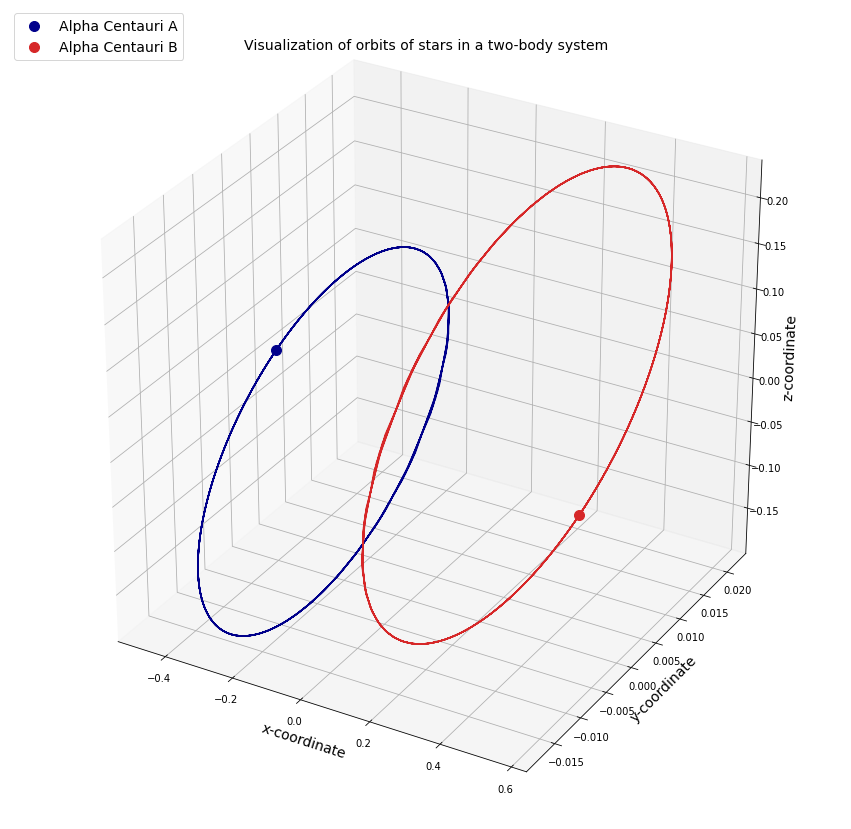

In [ ]:
# Creamos la figura
fig = plt.figure(figsize=(15, 15))
# Creamos los ejes en 3D
ax = fig.add_subplot(111, projection="3d")
# Graficamos las orbitas
ax.plot(r1com_sol[:,0], r1com_sol[:,1], r1com_sol[:,2], color="darkblue")
ax.plot(r2com_sol[:,0], r2com_sol[:,1], r2com_sol[:,2], color="tab:red")
# Graficamos la posición final de las estrellas
ax.scatter(r1com_sol[-1,0], r1com_sol[-1,1], r1com_sol[-1,2], color="darkblue", marker="o", s=100, label="Alpha Centauri A")
ax.scatter(r2com_sol[-1,0], r2com_sol[-1,1], r2com_sol[-1,2], color="tab:red", marker="o", s=100, label="Alpha Centauri B")
# Añadimos características
ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n", fontsize=14)
ax.legend(loc="upper left", fontsize=14)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")

r1_sol_anim = r1com_sol[::, :].copy()
r2_sol_anim = r2com_sol[::, :].copy()

trace1 = ax.plot(r1_sol_anim[:, 0], r1_sol_anim[:, 1], r1_sol_anim[:, 2], color="darkblue")
trace2 = ax.plot(r2_sol_anim[:, 0], r2_sol_anim[:, 1], r2_sol_anim[:, 2], color="tab:red")

head1 = [ax.scatter(r1_sol_anim[0, 0], r1_sol_anim[0, 1], r1_sol_anim[0, 2], color="darkblue", marker="o", s=100)]
head2 = [ax.scatter(r2_sol_anim[0, 0], r2_sol_anim[0, 1], r2_sol_anim[0, 2], color="tab:red", marker="o", s=100)]

def Animate(i, head1, head2):
    # Removemos los marcadores viejos
    head1[0].remove()
    head2[0].remove()

    # Traza las órbitas (en cada iteración trazamos desde la posición inicial hasta la posición actual)

    # Trazamos los marcadores actuales
    head1[0] = ax.scatter(r1_sol_anim[i - 1, 0], r1_sol_anim[i - 1, 1], r1_sol_anim[i - 1, 2], color="darkblue", marker="o", s=100)
    head2[0] = ax.scatter(r2_sol_anim[i - 1, 0], r2_sol_anim[i - 1, 1], r2_sol_anim[i - 1, 2], color="tab:red", marker="o", s=100)
    return head1, head2,

ax.set_xlabel("x-coordinate", fontsize=14)
ax.set_ylabel("y-coordinate", fontsize=14)
ax.set_zlabel("z-coordinate", fontsize=14)
ax.set_title("Visualization of orbits of stars in a two-body system\n", fontsize=14)

anim = animation.FuncAnimation(fig, Animate, interval=20, repeat=False, blit=False, fargs=(head1,head2))

matplotlib.rcParams['animation.embed_limit'] = 2**128
HTML(anim.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.